In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
Data1 = pd.read_excel('HallcurrentBvV.xlsx')

In [4]:
Icoil = Data1.iloc[:,0].values #A
Bvalues = Data1.iloc[:,1].values #Gauss
Vh = Data1.iloc[:,2].values #mV

In [5]:
Icoil

array([0.  , 0.1 , 0.21, 0.3 , 0.4 , 0.5 , 0.6 , 0.71, 0.8 , 0.9 , 1.01,
       1.11, 1.2 , 1.31, 1.43, 1.5 , 1.61, 1.7 , 1.8 , 1.9 , 2.  , 2.11,
       2.2 , 2.3 , 2.4 , 2.5 , 2.6 , 2.71, 2.8 , 2.91, 3.01, 3.1 , 3.21,
       3.31, 3.42, 3.51, 3.63, 3.71, 3.8 , 3.92, 4.  ])

In [6]:
Bvalues

array([ 120.8,  230. ,  343. ,  429. ,  535. ,  637. ,  752. ,  863. ,
        965. , 1077. , 1195. , 1302. , 1403. , 1519. , 1655. , 1726. ,
       1848. , 1951. , 2030. , 2130. , 2230. , 2360. , 2460. , 2560. ,
       2670. , 2770. , 2870. , 3000. , 3090. , 3200. , 3310. , 3400. ,
       3510. , 3610. , 3730. , 3800. , 3920. , 4010. , 4090. , 4200. ,
       4280. ])

In [7]:
Vh

array([ 0.13,  2.1 ,  3.9 ,  5.7 ,  7.6 ,  9.6 , 11.6 , 13.2 , 15.1 ,
       16.9 , 18.8 , 20.7 , 22.4 , 24.3 , 26.1 , 28.1 , 29.5 , 31.3 ,
       33.  , 34.7 , 36.4 , 37.9 , 39.6 , 41.  , 42.5 , 44.1 , 45.5 ,
       46.9 , 48.4 , 49.8 , 51.1 , 52.4 , 53.7 , 55.  , 56.5 , 57.6 ,
       58.8 , 59.9 , 61.1 , 62.1 , 63.5 ])

In [8]:
Data2 = pd.read_excel('HallTvsVh.xlsx',skiprows=1)

In [9]:
Temp = Data2.iloc[:,3].values #oC
Vy = Data2.iloc[:,6].values

In [10]:
Vy

array([47.5, 47.5, 46.9, 45.3, 40.5, 33.8, 23.4, 16.4,  9.8,  3.7, -0.4,
       -2. , -2.9])

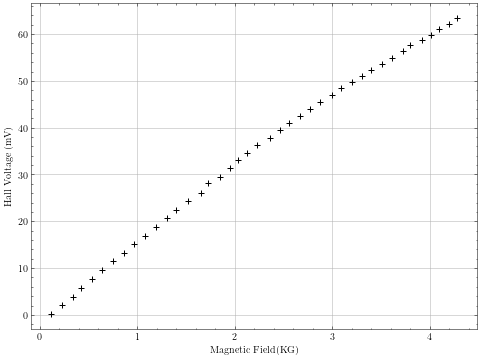

In [12]:

plt.figure(figsize=(8,6))
plt.style.use('science')
plt.plot(Bvalues/1000,Vh,"k+")
plt.grid()
plt.xlabel("Magnetic Field(KG)")
plt.ylabel("Hall Voltage (mV)")
plt.show()


In [13]:
def straight(x,m):
    return m*x

In [14]:
from scipy.optimize import curve_fit

In [15]:
popt, pcov = curve_fit(straight,Bvalues,Vh)

In [16]:
popt

array([0.01539977])

In [17]:
pcov

array([[6.11720527e-09]])

In [18]:
Bvalues

array([ 120.8,  230. ,  343. ,  429. ,  535. ,  637. ,  752. ,  863. ,
        965. , 1077. , 1195. , 1302. , 1403. , 1519. , 1655. , 1726. ,
       1848. , 1951. , 2030. , 2130. , 2230. , 2360. , 2460. , 2560. ,
       2670. , 2770. , 2870. , 3000. , 3090. , 3200. , 3310. , 3400. ,
       3510. , 3610. , 3730. , 3800. , 3920. , 4010. , 4090. , 4200. ,
       4280. ])

In [59]:
Vh

array([ 0.13,  2.1 ,  3.9 ,  5.7 ,  7.6 ,  9.6 , 11.6 , 13.2 , 15.1 ,
       16.9 , 18.8 , 20.7 , 22.4 , 24.3 , 26.1 , 28.1 , 29.5 , 31.3 ,
       33.  , 34.7 , 36.4 , 37.9 , 39.6 , 41.  , 42.5 , 44.1 , 45.5 ,
       46.9 , 48.4 , 49.8 , 51.1 , 52.4 , 53.7 , 55.  , 56.5 , 57.6 ,
       58.8 , 59.9 , 61.1 , 62.1 , 63.5 ])

In [20]:
yerr = straight(Bvalues,popt[0])-Vh

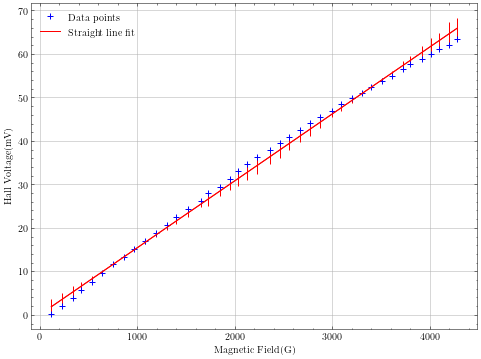

In [70]:
plt.figure(figsize=(8,6))
plt.style.use('science')
plt.plot(Bvalues,Vh,"b+",label="Data points")
xdata = np.linspace(100,5000,500)
y = straight(xdata, popt[0])


upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5

plt.plot(Bvalues,straight(Bvalues,popt[0]),"r-",label="Straight line fit")
plt.errorbar(Bvalues,straight(Bvalues,popt[0]), yerr=yerr,c="r")
plt.xlabel("Magnetic Field(G)")
plt.ylabel("Hall Voltage(mV)")

plt.legend()
plt.grid()
plt.savefig("HallvoltagevsM.pdf")


In [85]:
np.mean(yerr/Vh)

0.34390321838019833

In [100]:
np.mean(yerr)/np.mean(Vh)

-0.003614322333270515

In [97]:
3.247*0.343

1.113721

In [94]:
Vh

array([ 0.13,  2.1 ,  3.9 ,  5.7 ,  7.6 ,  9.6 , 11.6 , 13.2 , 15.1 ,
       16.9 , 18.8 , 20.7 , 22.4 , 24.3 , 26.1 , 28.1 , 29.5 , 31.3 ,
       33.  , 34.7 , 36.4 , 37.9 , 39.6 , 41.  , 42.5 , 44.1 , 45.5 ,
       46.9 , 48.4 , 49.8 , 51.1 , 52.4 , 53.7 , 55.  , 56.5 , 57.6 ,
       58.8 , 59.9 , 61.1 , 62.1 , 63.5 ])

In [93]:
yerr

array([ 1.73029191,  1.44194651,  1.38212023,  0.90650023,  0.63887558,
        0.20965186, -0.01937489,  0.0899993 , -0.23922442, -0.31445047,
       -0.39727791, -0.64950279, -0.79412628, -0.90775326, -0.61338489,
       -1.5200014 , -1.04122977, -1.25505373, -1.7384721 , -1.89849536,
       -2.05851861, -1.55654884, -1.7165721 , -1.57659536, -1.38262094,
       -1.44264419, -1.30266745, -0.70069768, -0.81471861, -0.5207442 ,
       -0.12676978, -0.04079071,  0.35318371,  0.59316045,  0.94113255,
        0.91911627,  1.56708836,  1.85306743,  1.88504882,  2.57902324,
        2.41100464])

In [92]:
yerr/Vh

array([ 1.33099377e+01,  6.86641196e-01,  3.54389803e-01,  1.59035128e-01,
        8.40625763e-02,  2.18387353e-02, -1.67024880e-03,  6.81812876e-03,
       -1.58426769e-02, -1.86065366e-02, -2.11318038e-02, -3.13769466e-02,
       -3.54520662e-02, -3.73561013e-02, -2.35013367e-02, -5.40925765e-02,
       -3.52959245e-02, -4.00975632e-02, -5.26809727e-02, -5.47116817e-02,
       -5.65527091e-02, -4.10698904e-02, -4.33477803e-02, -3.84535453e-02,
       -3.25322574e-02, -3.27130203e-02, -2.86300539e-02, -1.49402491e-02,
       -1.68330292e-02, -1.04567108e-02, -2.48081757e-03, -7.78448632e-04,
        6.57697784e-03,  1.07847355e-02,  1.66572132e-02,  1.59568796e-02,
        2.66511626e-02,  3.09360172e-02,  3.08518629e-02,  4.15301649e-02,
        3.79685770e-02])

In [89]:
0.3439*RH

0.006619975027724037

In [91]:
0.3439*3.247*10**(20)

1.1166433000000001e+20

In [24]:
slope = popt[0]*(10**(-3)/10**(-4))

In [76]:
pcov[0]*(10**(-3)/10**(-4))

array([6.11720527e-08])

In [77]:
slope 

0.1539976743872995

In [30]:
t = 0.5 *10**(-3) #mm
I = 4 * 10**(-3) #mA

In [33]:
RH = slope * t/I #m^3/C

In [82]:
1/(RH *1.6 *10**(-19)) * 10**(-6)

324680227795203.6

In [81]:
RH

0.019249709298412437

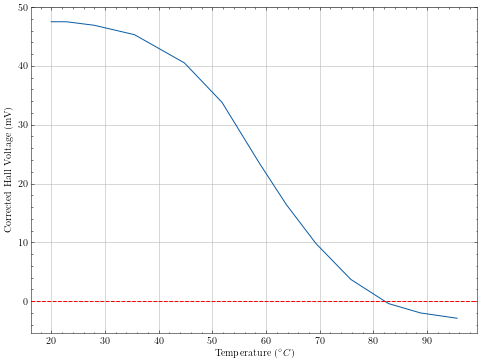

In [40]:
plt.figure(figsize=(8,6))
plt.style.use('science')
plt.plot(Temp,Vy)
plt.grid()
plt.axhline(0,ls="--",c="r")
plt.xlabel("Temperature ($^{\circ} C$)")
plt.ylabel("Corrected Hall Voltage (mV)")
plt.show()

In [41]:
H = 3 * 10**3 * 10**(-4) #T
I = 4 * 10**(-3) #A
t = 0.5 *10**(-3) #mm

In [44]:
Rhvalues = (Vy*10**(-3))*t/(I*H)

In [45]:
Rhvalues

array([ 0.01979167,  0.01979167,  0.01954167,  0.018875  ,  0.016875  ,
        0.01408333,  0.00975   ,  0.00683333,  0.00408333,  0.00154167,
       -0.00016667, -0.00083333, -0.00120833])

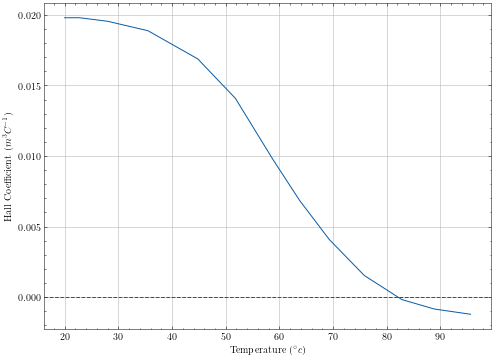

In [48]:
plt.figure(figsize=(8,6))
plt.style.use('science')
plt.plot(Temp,Rhvalues)
plt.grid()
plt.axhline(0,ls="--",c="r")
plt.xlabel("Temperature ($^{\circ} c$)")
plt.ylabel("Hall Coefficient ($m^3 C^{-1}$)")
plt.show()

In [52]:
Rhv = Rhvalues*1000

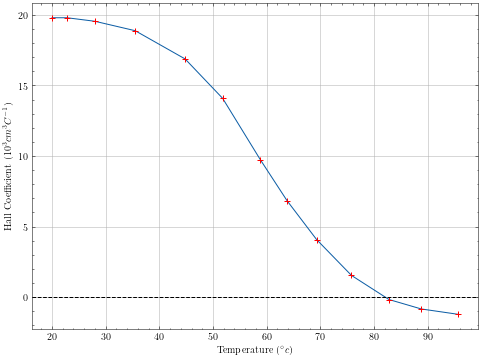

In [58]:
plt.figure(figsize=(8,6))
plt.style.use('science')
plt.plot(Temp,Rhv)
plt.plot(Temp,Rhv,"r+")
plt.grid()
plt.axhline(0,ls="--",c="k")
plt.xlabel("Temperature ($^{\circ} c$)")
plt.ylabel("Hall Coefficient ($10^3 cm^3 C^{-1}$)")
plt.savefig("RhvsT.pdf")
plt.show()

In [74]:
for i in Rhv:
    print(i)

19.791666666666668
19.791666666666668
19.541666666666668
18.875000000000004
16.875
14.083333333333334
9.75
6.833333333333334
4.083333333333334
1.541666666666667
-0.16666666666666669
-0.8333333333333334
-1.2083333333333335
